# About the notebook

**Set directory**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Duke_BIOS824_CaseStudies"
!pwd

/content/gdrive/My Drive/Colab Notebooks/Duke_BIOS824_CaseStudies
/content/gdrive/My Drive/Colab Notebooks/Duke_BIOS824_CaseStudies


In [11]:
ls

data/                                 mod01_lec02_cnn_mnist.ipynb
figures/                              mod01_lec02_try_google_colab.ipynb
hw01_image_apply_linear_filter.ipynb  README.md
mod01_hw02_CNN_overtrain.ipynb


# Download needed data

**Image: mazurowski_lab**

```
!wget http://deckard.duhs.duke.edu/~mazurowski/images/mazurowski_lab_2017_08.jpg -P /figures
!ls /figures
img = image.load_img("/figures/mazurowski_lab_2017_08.jpg")
plt.imshow(img)
```

**code mnist_cnn.py**

In [19]:
!wget https://raw.githubusercontent.com/keras-team/keras/master/examples/mnist_cnn.py -P /scripts

--2019-01-21 21:55:41--  https://raw.githubusercontent.com/keras-team/keras/master/examples/mnist_cnn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2257 (2.2K) [text/plain]
Saving to: ‘/scripts/mnist_cnn.py’

mnist_cnn.py        100%[===================>]   2.20K  --.-KB/s    in 0s      

2019-01-21 21:55:41 (58.1 MB/s) - ‘/scripts/mnist_cnn.py’ saved [2257/2257]



In [20]:
!ls /scripts

mnist_cnn.py


# Decomposed the code mnist_cnn.py

### Take a look at the code

In [21]:
!cat /scripts/mnist_cnn.py

'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img

### Import libraries

In [1]:
### import libraris
import numpy as np

### keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

### library for reading images
from keras import applications
from keras.preprocessing import image

### plotting
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Set Constants

In [0]:
# model constants
batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

### Load MNIST data

In [7]:
### the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### observe data dimension
print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", x_test.shape)
print("y_test: ", y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


### Add Channel Dimension

In [9]:
### Add Channel Dimension
### (N, 28, 28) -> (N, 28, 28, 1)
### (N, 28, 28) -> (N, 1, 28, 28)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print("X_train:", x_train.shape)
print("X_test: ", x_test.shape)

X_train: (60000, 28, 28, 1)
X_test:  (10000, 28, 28, 1)


In [6]:
K.image_data_format()

'channels_last'

### Convert each class outcome to class vectors

In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)

y_train: (60000, 10)
y_test:  (10000, 10)


In [11]:
y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
np.where(y_train[:3] == 1.0)[1]

array([5, 0, 4])

### Build Model

In [0]:
### Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

### Multilayer Perceptron (fully connected network)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

### Softmax operation
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Model Structure

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### ***Fitting the model***

In [18]:
fit_of_the_model = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 184s 3ms/step - loss: 0.2581 - acc: 0.9219 - val_loss: 0.0631 - val_acc: 0.9796
Epoch 2/5
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0855 - acc: 0.9752 - val_loss: 0.0414 - val_acc: 0.9861
Epoch 3/5
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0648 - acc: 0.9807 - val_loss: 0.0411 - val_acc: 0.9861
Epoch 4/5
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0533 - acc: 0.9843 - val_loss: 0.0337 - val_acc: 0.9883
Epoch 5/5
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0447 - acc: 0.9867 - val_loss: 0.0302 - val_acc: 0.9890
Test loss: 0.03024925076371146
Test accuracy: 0.989


### Visualizing Loss and Accuracy

*Reference*
- [Visualizing intermediate activation in Convolutional Neural Networks with Keras](https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0)

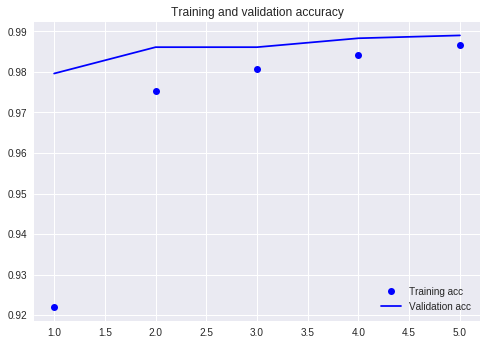

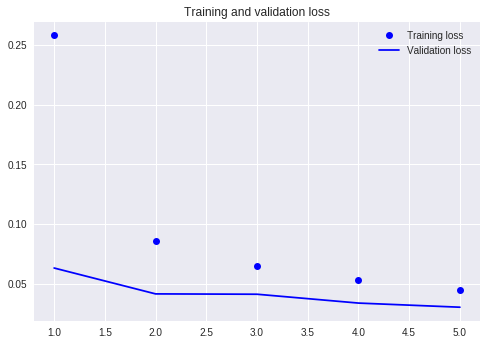

In [20]:
history = fit_of_the_model

### get accuracy and loss along the iterations
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

### plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

### plot loss
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Get weights

*Reference*
- [How to correctly get layer weights from Conv2D in keras?](https://stackoverflow.com/questions/43305891/how-to-correctly-get-layer-weights-from-conv2d-in-keras)
- [Extract weight matrix](https://github.com/keras-team/keras/issues/91)

```
### Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

### Multilayer Perceptron (fully connected network)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

### Softmax operation
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
```

**model.add(Conv2D(32, <font color="red">kernel_size=(3, 3)</font>, activation='relu', input_shape=input_shape))**

In [23]:
print(len(model.layers))
model.layers

8


In [64]:
### first layer
weights = model.layers[0].get_weights()
print(len(weights))

### shape
print("- Filter", weights[0].shape)
print("- Bias", weights[1].shape)

2
- Filter (3, 3, 1, 32)
- Bias (32,)


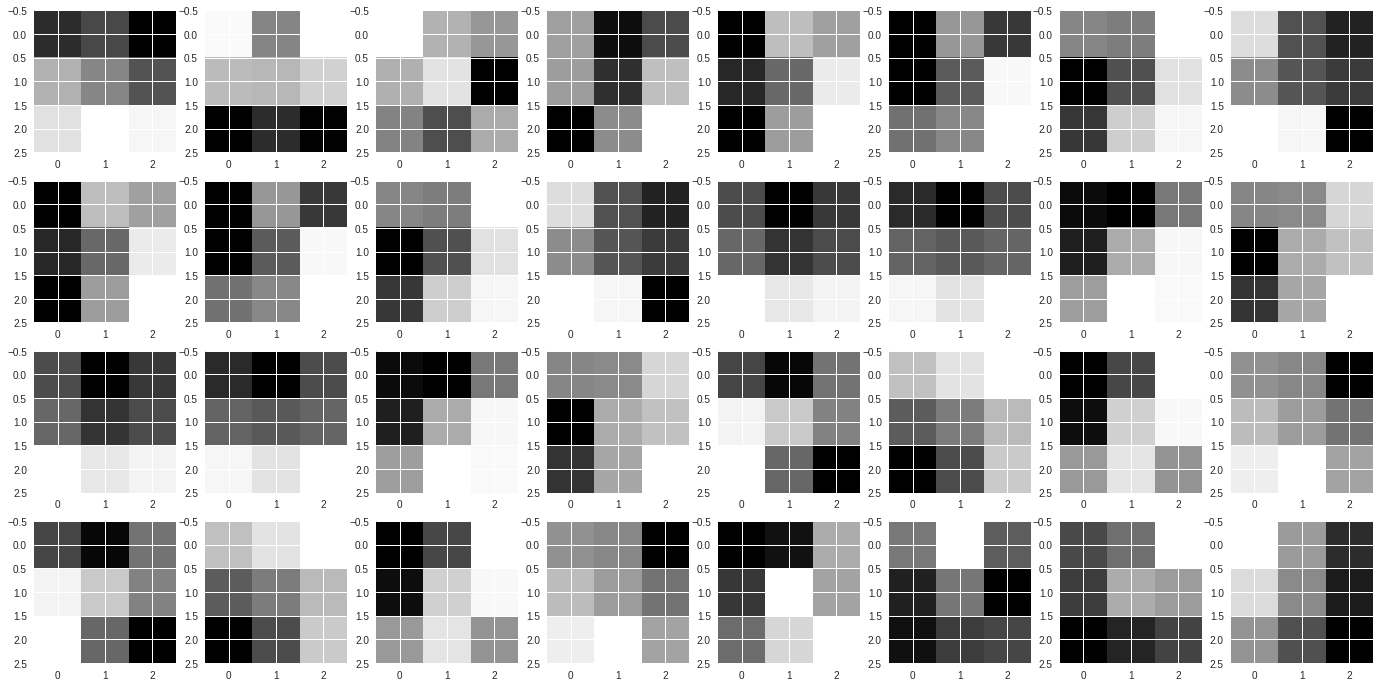

In [62]:
nr, nc = 4, 8
unit   = 3
fig, axes = plt.subplots(ncols=nc, nrows=nr, figsize=(nc * unit, nr * unit))
for idxr in range(nr):
    for idxc in range(nc):
        idx = idxr * nr + idxc
        axes[idxr, idxc].imshow(weights[0][:, :, 0, idx], cmap = "gray")

### Visualizing intermediate activations

*Reference*
- [Visualizing intermediate activation in Convolutional Neural Networks with Keras](https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0)

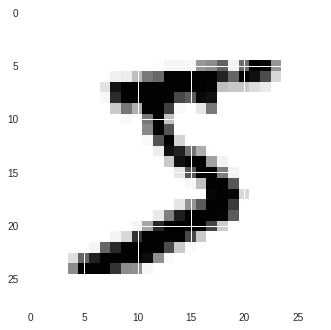

In [71]:
plt.imshow(x_train[0, :, :, 0])
pass

In [80]:
from keras import models
# get each layers
layer_outputs = [layer.output for layer in model.layers[:12]] 

# Extracts the outputs of the top 12 layers
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(
    inputs  = model.input, 
    outputs = layer_outputs) 

# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(x_train[0:1]) 
print(len(activations))

8


(1, 26, 26, 32)


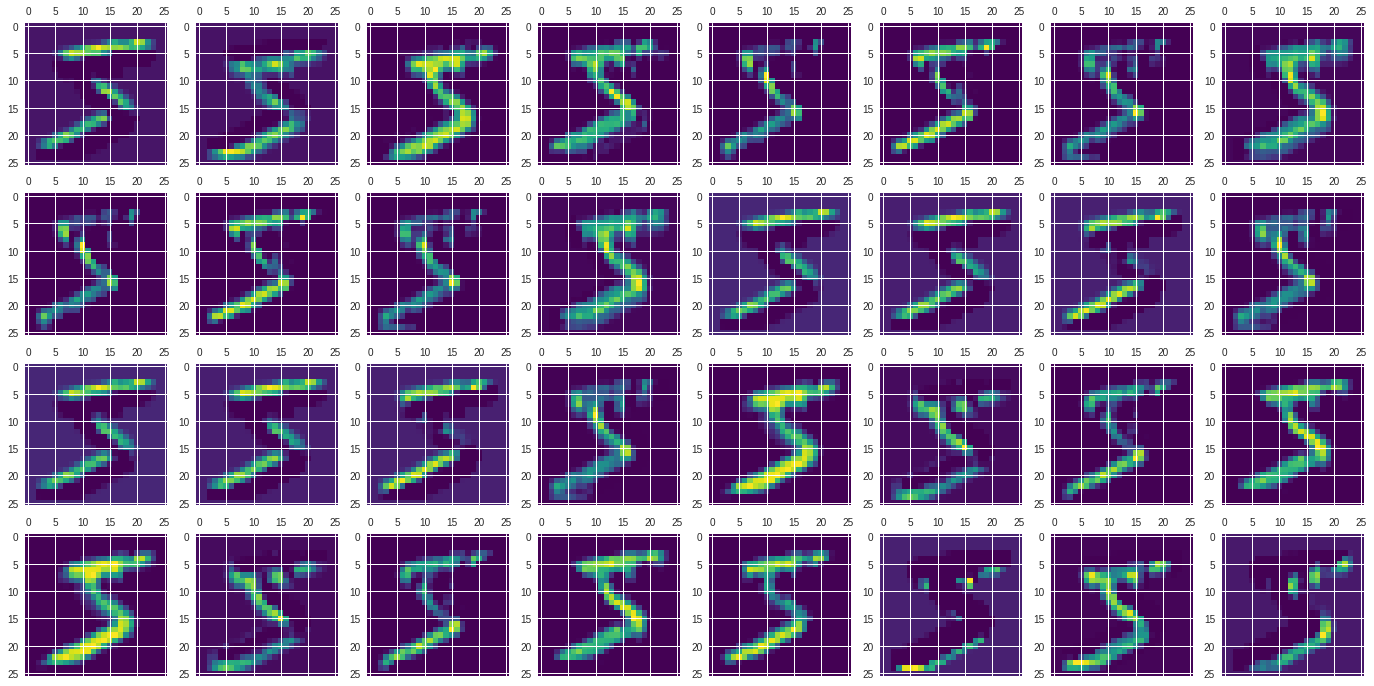

In [84]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

nr, nc = 4, 8
unit   = 3
fig, axes = plt.subplots(ncols=nc, nrows=nr, figsize=(nc * unit, nr * unit))
for idxr in range(nr):
    for idxc in range(nc):
        idx = idxr * nr + idxc
        axes[idxr, idxc].matshow(first_layer_activation[0, :, :, idx], cmap='viridis')

**Visualizing every channel in every intermediate activation**

In [87]:
model.layers

[Visualizing every channel in every intermediate activation](https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md#visualizing-every-channel-in-every-intermediate-activation)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


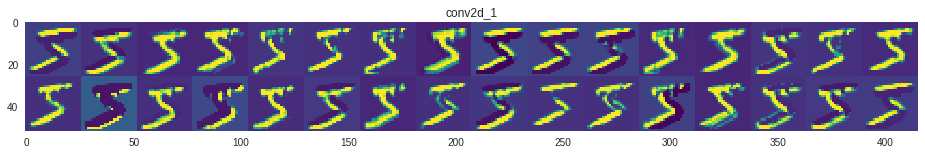

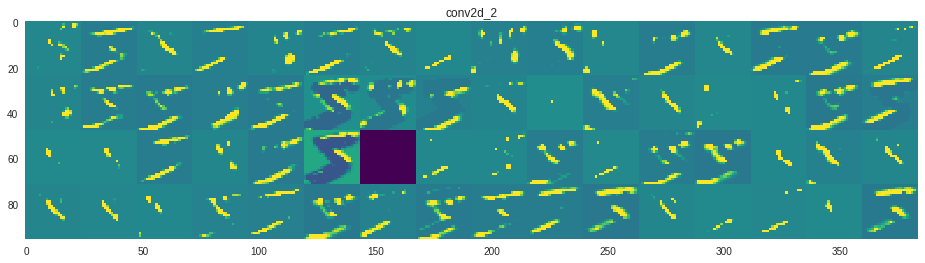

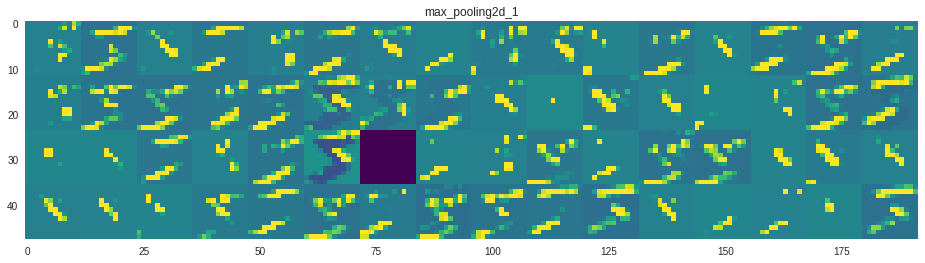

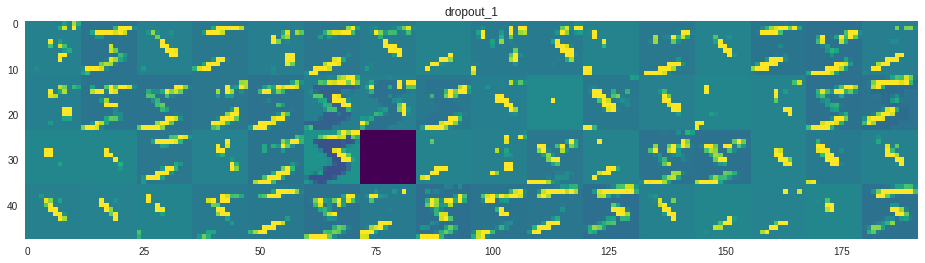

In [88]:
### initialization
layer_names = []

### get each layers
for layer in model.layers[:4]:
    # Names of the layers, so you can have them as part of your plot
    layer_names.append(layer.name) 


### set plot
images_per_row = 16

### plot activation for each layer
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    ### initialization
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] # The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    ### plot activation for each filter
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            
            ### get the activation  
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
            ### normalization
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            
            ### ???
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Overtrain
